# Case Study 2 : Data Science in Yelp Data

**Required Readings:** 
* [Yelp Dataset Challenge](https://www.yelp.com/dataset_challenge) 
* Please download the Yelp dataset from the above webpage.
* [TED Talks](https://www.ted.com/talks) for examples of 10 minutes talks.


** NOTE **
* Please don't forget to save the notebook frequently when working in Jupyter Notebook, otherwise the changes you made can be lost.

*----------------------

Here is an example of the data format. More details are included [here](https://www.yelp.com/dataset_challenge)

## Business Objects

Business objects contain basic information about local businesses. The fields are as follows:

```json
{
  'type': 'business',
  'business_id': (a unique identifier for this business),
  'name': (the full business name),
  'neighborhoods': (a list of neighborhood names, might be empty),
  'full_address': (localized address),
  'city': (city),
  'state': (state),
  'latitude': (latitude),
  'longitude': (longitude),
  'stars': (star rating, rounded to half-stars),
  'review_count': (review count),
  'photo_url': (photo url),
  'categories': [(localized category names)]
  'open': (is the business still open for business?),
  'schools': (nearby universities),
  'url': (yelp url)
}
```
## Checkin Objects
```json
{
    'type': 'checkin',
    'business_id': (encrypted business id),
    'checkin_info': {
        '0-0': (number of checkins from 00:00 to 01:00 on all Sundays),
        '1-0': (number of checkins from 01:00 to 02:00 on all Sundays),
        ...
        '14-4': (number of checkins from 14:00 to 15:00 on all Thursdays),
        ...
        '23-6': (number of checkins from 23:00 to 00:00 on all Saturdays)
    }, # if there was no checkin for a hour-day block it will not be in the dict
}
```

# Problem: pick a data science problem that you plan to solve using Yelp Data


We are interested in what's behind the curtain of rating. We initially come up with two problems.
1. Will having more followers at Yelp rate more frequently than other users
2. Will having more followers at Yelp rate higher than other users

We'd like to explore the difference between 'Elite' user group and the others. 'Elite' users are active Yelp reviewers selected by Yelp's National Elite Squad Council. Selection criteria are unknown. Some of criteria include well-written reviews, high quality tips, a detailed personal profile, an active voting and complimenting record, and a history of playing well with others. They are invited to private events where up-and-coming restaurants and bars provide food and drinks for free. We can recognize whether a user is 'Elite' or not by filter(elite != "[]") in the 'user.json'.

We plan to generate 4 graphs from the dataset.
1. Scatter plot with all users included. Y-axis is review count, x-axis is fans number.
2. Make another scatter plot using only elite users.
3. Box plot with all users included. Y-axis is users' average rating, x-axis is fans number. We'll generate four box: [0-250], [250-500], [500-1000], [greater than 1000].
4. We all make another box plot using only elite users.


# Data Collection/Processing: 

In [1]:
# Download datasets from Yelp website.
# There are six json files, which are business, checkin, photos, review, tip, user.json.
# Each file is composed of a single object type, one JSON-object per-line.
!pip install prettytable


  Using cached prettytable-0.7.2.zip
  Running setup.py bdist_wheel for prettytable ... - done
  Stored in directory: /Users/Seven/Library/Caches/pip/wheels/b6/90/7b/1c22b89217d0eba6d5f406e562365ebee804f0d4595b2bdbcd
Successfully built prettytable


# Data Exploration: Exploring the Yelp Dataset

**(1) Finding the most popular business categories:** 
* print the top 10 most popular business categories in the dataset and their counts (i.e., how many business objects in each category). Here we say a category is "popular" if there are many business objects in this category (such as 'restaurants').

In [11]:
import json
from collections import Counter
from prettytable import PrettyTable

with open('dataset/business.json', 'rb') as f:
    info = f.readlines()

count = dict()
for i in range(len(info)):
    data = json.loads(info[i])
    for j in range(len(data['categories'])):
        count[data['categories'][j]] = count.get(data['categories'][j], 0) + 1

pt = PrettyTable(field_names=['categories', 'Count'])
c = Counter(count)
[pt.add_row(kv) for kv in c.most_common()[:10]]
pt.align['words'], pt.align['Count'] = 'l', 'r' # Set column alignment
print(pt)

+------------------+-------+
|    categories    | Count |
+------------------+-------+
|   Restaurants    | 54618 |
|     Shopping     | 27971 |
|       Food       | 24777 |
|  Beauty & Spas   | 17014 |
|  Home Services   | 16205 |
| Health & Medical | 14230 |
|    Nightlife     | 12154 |
|  Local Services  | 11232 |
|    Automotive    | 11052 |
|       Bars       | 10563 |
+------------------+-------+


** (2) Find the most popular business objects** 
* print the top 10 most popular business objects in the dataset and their counts (i.e., how many checkins in total for each business object).  Here we say a business object is "popular" if the business object attracts a large number of checkins from the users.

In [13]:
import json
from collections import Counter
from prettytable import PrettyTable

with open('dataset/checkin.json', 'rb') as f:
    info = f.readlines()

count = dict()
for i in range(len(info)):
    data = json.loads(info[i])
    for v in data['time'].values():
        for j in v.values():
            count[data['business_id']] = count.get(data['business_id'], 0) + j


pt = PrettyTable(field_names=['business_id', 'checkin_counts'])
c = Counter(count)
[pt.add_row(kv) for kv in c.most_common()[:10]]
pt.align['words'], pt.align['Count'] = 'l', 'r' 
print(pt)

+------------------------+----------------+
|      business_id       | checkin_counts |
+------------------------+----------------+
| FaHADZARwnY4yvlvpnsfGA |     131958     |
| JmI9nslLD7KZqRr__Bg6NQ |     112590     |
| yQab5dxZzgBLTEHCw9V7_w |     49934      |
| 5LNZ67Yw9RD6nf4_UhXOjw |     43995      |
| SMPbvZLSMMb7KU76YNYMGg |     32603      |
| IZivKqtHyz4-ts8KsnvMrA |     32393      |
| Wxxvi3LZbHNIDwJ-ZimtnA |     30583      |
| na4Th5DrNauOv-c43QQFvA |     29271      |
| El4FC8jcawUVgw_0EIcbaQ |     28272      |
| VyjyHoBg3KC5BSFRlD0ZPQ |     27306      |
+------------------------+----------------+


# The Solution: implement a data science solution to the problem you are trying to solve.

Our problems are: 
​
    1. Will having more followers at Yelp rate more frequently than other users
    2. Will having more followers at Yelp rate higher than other users
    
In order to solve problem 1, we would like to visualize the relationship between review_count and the overall users, elite users, and normal users separately by using boxplot. Besides, we will try to demonstrate this relationship by plotting regression line.
​
For problem 2, the mothods are as same as above.

Write codes to implement the solution in python:

In [2]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

import io, json
# It might take a while to load data
print("loading...")
user_result = []
with open('dataset/user.json', 'r') as curr_file:
    line = curr_file.readline()
    while line:
        tw = json.loads(line)
        user_result.append(tw)
        line = curr_file.readline()

print("complete.")

loading...
complete.


In [3]:
# Find the review_count & number of fans for each user
review_count = []
fans = []
for u in user_result:
    review_count.append(u["review_count"])
    fans.append(u["fans"])

In [4]:
# Plot the relationship between review_count and number of fans 
# by using box plot with x-axis as number of fans and 
# y-axis as review_count

def fun_clas(fan):
    fan_label = []
    
    for i in range(len(fan)):
        if 0 <= fan[i] and fan[i] < 250:
            fan_label.append('0 -- 250')

        elif 250 <= fan[i] and fan[i] < 500:
            fan_label.append('250 -- 500')

        elif 500 <= fan[i] and fan[i] < 1000:
            fan_label.append('500 -- 1000')
            
        elif 1000 <= fan[i] and fan[i] < 2000:
            fan_label.append('1000 -- 2000')

        else:
            fan_label.append('Above 2000')  
    
    return fan_label

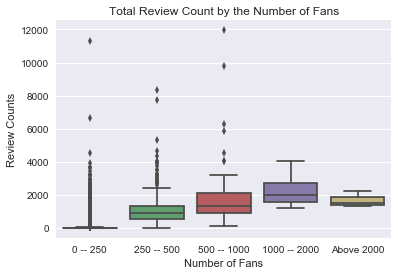

In [28]:
# Total Review Count by the Number of Fans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fans_Label = fun_clas(fans)
sns.boxplot(x=fans_Label,y=review_count, order=['0 -- 250', '250 -- 500', '500 -- 1000', '1000 -- 2000', 'Above 2000'])
plt.title('Total Review Count by the Number of Fans')
plt.xlabel('Number of Fans')
plt.ylabel('Review Counts')


In [29]:
# Divide Data Into Elite and Normal User
review_count_Elite = []
review_count_Normal = []
fan_Elite = []
fan_Normal = []
for u in user_result:  
    if u["elite"] != []:
        review_count_Elite.append(u["review_count"])
        fan_Elite.append(u["fans"])
    else:
        review_count_Normal.append(u["review_count"])
        fan_Normal.append(u["fans"])

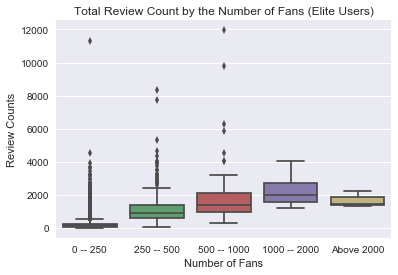

In [30]:
# Total Review Count by the Number of Fans (Elite Users)
fans_Elite_Label = fun_clas(fan_Elite)
sns.boxplot(x=fans_Elite_Label,y=review_count_Elite, order=['0 -- 250', '250 -- 500', '500 -- 1000', '1000 -- 2000', 'Above 2000'])
plt.title('Total Review Count by the Number of Fans (Elite Users)')
plt.xlabel('Number of Fans')
plt.ylabel('Review Counts')


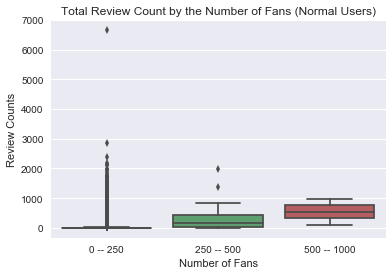

In [31]:
# Total Review Count by the Number of Fans (Normal Users)
fans_Normal_Label = fun_clas(fan_Normal)
sns.boxplot(x=fans_Normal_Label,y=review_count_Normal, order=['0 -- 250', '250 -- 500', '500 -- 1000'])
plt.title('Total Review Count by the Number of Fans (Normal Users)')
plt.xlabel('Number of Fans')
plt.ylabel('Review Counts')

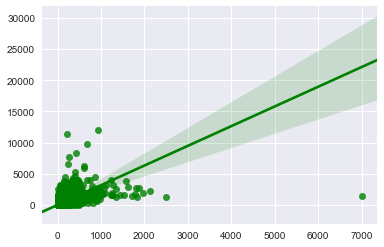

In [9]:
import numpy as np
ax = sns.regplot(x=np.asarray(fans), y=np.asarray(review_count), color="g")

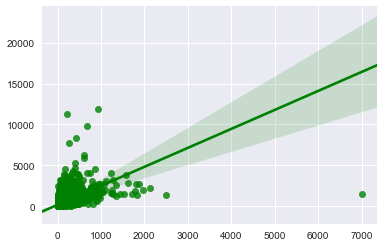

In [10]:
ax = sns.regplot(x=np.asarray(fan_Elite), y=np.asarray(review_count_Elite), color="g")

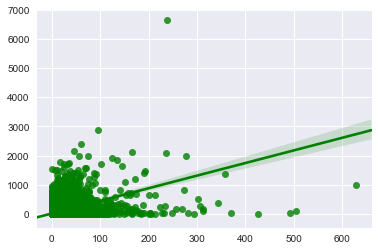

In [11]:
ax = sns.regplot(x=np.asarray(fan_Normal), y=np.asarray(review_count_Normal), color="g")

In [12]:
# Find the ratings & number of fans for each user
rating = []
for u in user_result:
    rating.append(u["average_stars"])

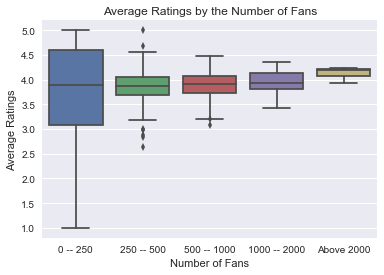

In [32]:
# Average Ratings by the Number of Fans
fans_Label = fun_clas(fans)
sns.boxplot(x=fans_Label,y=rating, order=['0 -- 250', '250 -- 500', '500 -- 1000', '1000 -- 2000', 'Above 2000'])
plt.title('Average Ratings by the Number of Fans')
plt.xlabel('Number of Fans')
plt.ylabel('Average Ratings')

In [14]:
# Divide Data Into Elite and Normal User
rating_Elite = []
rating_Normal = []
fan_Elite = []
fan_Normal = []
for u in user_result:  
    if u["elite"] != []:
        rating_Elite.append(u["average_stars"])
        fan_Elite.append(u["fans"])
    else:
        rating_Normal.append(u["average_stars"])
        fan_Normal.append(u["fans"])

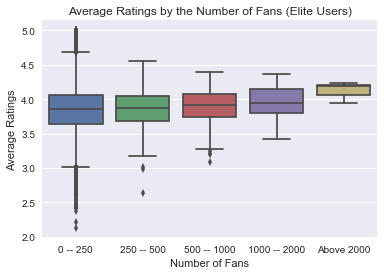

In [33]:
# Average Ratings by the Number of Fans (Elite Users)
fans_Elite_Label = fun_clas(fan_Elite)
sns.boxplot(x=fans_Elite_Label,y=rating_Elite, order=['0 -- 250', '250 -- 500', '500 -- 1000', '1000 -- 2000', 'Above 2000'])
plt.title('Average Ratings by the Number of Fans (Elite Users)')
plt.xlabel('Number of Fans')
plt.ylabel('Average Ratings')

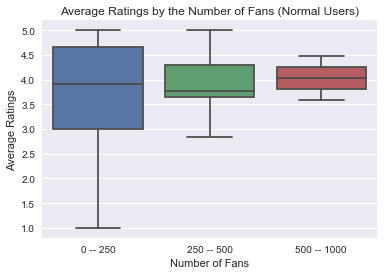

In [34]:
# Average Ratings by the Number of Fans (Normal Users)
fans_Normal_Label = fun_clas(fan_Normal)
sns.boxplot(x=fans_Normal_Label,y=rating_Normal, order=['0 -- 250', '250 -- 500', '500 -- 1000'])
plt.title('Average Ratings by the Number of Fans (Normal Users)')
plt.xlabel('Number of Fans')
plt.ylabel('Average Ratings')

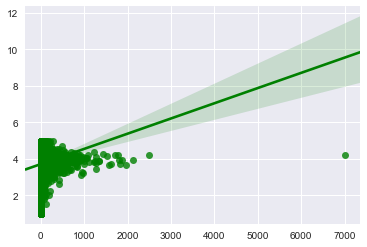

In [22]:
ax = sns.regplot(x=np.asarray(fans), y=np.asarray(rating), color="g")

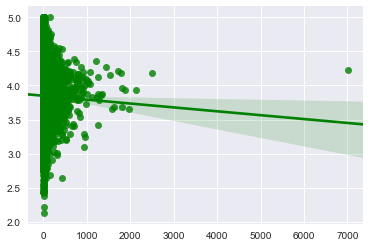

In [23]:
ax = sns.regplot(x=np.asarray(fan_Elite), y=np.asarray(rating_Elite), color="g")

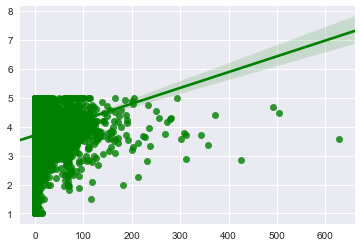

In [24]:
ax = sns.regplot(x=np.asarray(fan_Normal), y=np.asarray(rating_Normal), color="g")

Our first visualization, boxplot about the number of fans and review counts, shows that there exists a gradually increasing relationship between number of fans and review counts, but at some points around 2000, the pattern then decreases. We think Yelp users with more fans would like to aggressively provide more reviews. But when they have enough fans, they tend not to review actively. 

From our boxplot for elite group, the pattern shows similarity with the one with whole users does. 

From our boxplot for normal users group, the pattern is similar to the previous groups. But normal people tend to have less than 1000 fans. 

From the first two boxplots, we find that there are more outliers when people have fewer fans. We think the reason why it happens like this is that when people have fewer fans, they try to provide more reviews in order to get more followers. 

Morever, there are some users with high frequency of review but still regarded as normal users. This might be caused by inappropriate review content or fake information.

# Results: summarize and visualize the results discovered from the analysis

See most results in the section above.

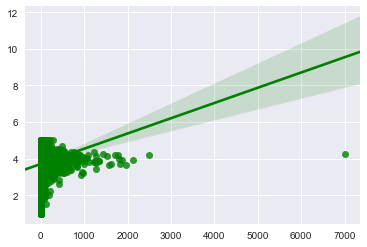

In [25]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
ax = sns.regplot(x=np.asarray(fans), y=np.asarray(rating), color="g")


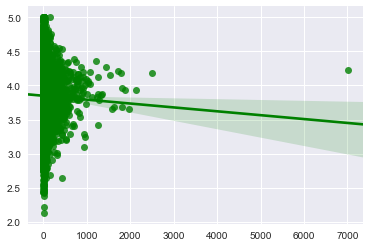

In [26]:
ax = sns.regplot(x=np.asarray(fan_Elite), y=np.asarray(rating_Elite), color="g")

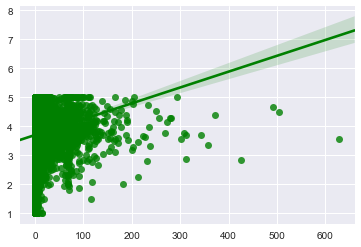

In [27]:
ax = sns.regplot(x=np.asarray(fan_Normal), y=np.asarray(rating_Normal), color="g")

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "jupyter notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.

* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . Each team present their case studies in class for 10 minutes.

Please compress all the files in a zipped file.


** How to submit: **

        Please submit through Canvas, in the Assignment "Case Study 2".
        
** Note: Each team only needs to submit one submission in Canvas **


# Peer-Review Grading Template:

** Total Points: (100 points) ** Please don't worry about the absolute scores, we will rescale the final grading according to the performance of all teams in the class.

Please add an "**X**" mark in front of your rating: 

For example:

*2: bad*
          
**X** *3: good*
    
*4: perfect*


    ---------------------------------
    The Problem: 
    ---------------------------------
    
    1. (10 points) how well did the team describe the problem they are trying to solve using the data? 
       0: not clear
       2: I can barely understand the problem
       4: okay, can be improved
       6: good, but can be improved
       8: very good
       10: crystal clear
    
    2. (10 points) do you think the problem is important or has a potential impact?
        0: not important at all
        2: not sure if it is important
        4: seems important, but not clear
        6: interesting problem
        8: an important problem, which I want to know the answer myself
       10: very important, I would be happy invest money on a project like this.
    
    ----------------------------------
    Data Collection and Processing:
    ----------------------------------
    
    3. (10 points) Do you think the data collected/processed are relevant and sufficient for solving the above problem? 
       0: not clear
       2: I can barely understand what data they are trying to collect/process
       4: I can barely understand why the data is relevant to the problem
       6: the data are relevant to the problem, but better data can be collected
       8: the data collected are relevant and at a proper scale
      10: the data are properly collected and they are sufficient

    -----------------------------------
    Data Exploration:
    -----------------------------------
    4. How well did the team solve the following task:
    
    (1) Finding the most popular business categories (5 points):
       0: missing answer
       1: okay, but with major problems
       3: good, but with minor problems
       5: perfect
    
    (2) Find the most popular business objects (5 points)
       0: missing answer
       1: okay, but with major problems
       3: good, but with minor problems
       5: perfect
    
    -----------------------------------
    The Solution
    -----------------------------------
    5.  how well did the team describe the solution they used to solve the problem? (10 points)
       0: not clear
       2: I can barely understand
       4: okay, can be improved
       6: good, but can be improved
       8: very good
       10: crystal clear
       
    6. how well is the solution in solving the problem? (10 points)
       0: not relevant
       2: barely relevant to the problem
       4: okay solution, but there is an easier solution.
       6: good, but can be improved
       8: very good, but solution is simple/old
       10: innovative and technically sound
       
    7. how well did the team implement the solution in python? (10 points)
       0: the code is not relevant to the solution proposed
       2: the code is barely understandable, but not relevant
       4: okay, the code is clear but incorrect
       6: good, the code is correct, but with major errors
       8: very good, the code is correct, but with minor errors
      10: perfect 
   
    -----------------------------------
    The Results
    -----------------------------------
     8.  How well did the team present the results they found in the data? (10 points)
       0: not clear
       2: I can barely understand
       4: okay, can be improved
       6: good, but can be improved
       8: very good
      10: crystal clear
       
     9.  How do you think of the results they found in the data?  (5 points)
       0: not clear
       1: likely to be wrong
       2: okay, maybe wrong
       3: good, but can be improved
       4: make sense, but not interesting
       5: make sense and very interesting
     
    -----------------------------------
    The Presentation
    -----------------------------------
    10. How all the different parts (data, problem, solution, result) fit together as a coherent story?  
       0: they are irrelevant
       1: I can barely understand how they are related to each other
       2: okay, the problem is good, but the solution doesn't match well, or the problem is not solvable.
       3: good, but the results don't make much sense in the context
       4: very good fit, but not exciting (the storyline can be improved/polished)
       5: a perfect story
      
    11. Did the presenter make good use of the 10 minutes for presentation?  
       0: the team didn't present
       1: bad, barely finished a small part of the talk
       2: okay, barely finished most parts of the talk.
       3: good, finished all parts of the talk, but some part is rushed
       4: very good, but the allocation of time on different parts can be improved.
       5: perfect timing and good use of time      

    12. How well do you think of the presentation (overall quality)?  
       0: the team didn't present
       1: bad
       2: okay
       3: good
       4: very good
       5: perfect


    -----------------------------------
    Overall: 
    -----------------------------------
    13. How many points out of the 100 do you give to this project in total?  Please don't worry about the absolute scores, we will rescale the final grading according to the performance of all teams in the class.
    Total score:
    
    14. What are the strengths of this project? Briefly, list up to 3 strengths.
       1: 
       2:
       3:
    
    15. What are the weaknesses of this project? Briefly, list up to 3 weaknesses.
       1:
       2:
       3:
    
    16. Detailed comments and suggestions. What suggestions do you have for this project to improve its quality further.
    
    
    

    ---------------------------------
    Your Vote: 
    ---------------------------------
    1. [Overall Quality] Between the two submissions that you are reviewing, which team would you vote for a better score?  (5 bonus points)
        0: I vote the other team is better than this team
        5: I vote this team is better than the other team 
        
    2. [Presentation] Among all the teams in the presentation, which team do you think deserves the best presentation award for this case study?  
        1: Team 1
        2: Team 2
        3: Team 3
        4: Team 4
        5: Team 5
        6: Team 6
        7: Team 7
        8: Team 8
        9: Team 9


